In [1]:
import random, math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from matplotlib import style
style.use('seaborn')

In [2]:
def exprand(lambdr):
    return -math.log(1.0 - random.random()) / lambdr

class Customer:
    def __init__(self, count, y, time_to_process_this_customer):
        self.count = count  # номер человека
        self.y = y # время, через которое он придет
        self.time_when_customer_will_arrive = 0 #время, в которое он придет
        self.time_to_process_this_customer = round(time_to_process_this_customer) + 1 # время на обработку этого человека (+1 временное решение того, что 0 требуется на процесс)


# Обработчик
class Handler:
    def __init__(self, id):
        self.customer = None
        self.id = id

    def process_customer(self):
        if (self.customer is not None):
            print("Id of handler:"+str(self.id))
            self.customer.time_to_process_this_customer -= 1
            print("Time left:" + str(self.customer.time_to_process_this_customer))
            if (self.customer.time_to_process_this_customer < 1):
                self.customer = None
                print("Processed!")

In [6]:
# Вeликий обрабатор!
class MainHandler:
    def __init__(self, number_of_handlers, number_of_customers):
        self.number_of_handlers = number_of_handlers
        self.number_of_customers = number_of_customers
        self.list_of_customers = []
        self.list_of_handlers = []
        self.gone = 0
        self.customers_growth = []
        self.customers_all = 0
        self.mean_time_spent = []
        self.handler_load = []
        
    def get_next(self, count, lambd,nu):
        # Устанавливаем номер человека
        # время, через котрое он придет
        # и время, которое требуется на его обработку
        customer = Customer(count, exprand(1/lambd), exprand(1/nu))
    
        return customer
    
    def generate_customers(self, steps):
        lost_time = steps  # оставшееся количество шагов == время для генерации

        count = 0
        while (lost_time > 0):
            count += 1
            customer = self.get_next(count, lambda_, nu)
            lost_time -= customer.y
            customer.time_when_customer_will_arrive = round(steps - lost_time)
            self.list_of_customers.append(customer)

        print("Number of customers:" + str(len(self.list_of_customers)))
        for customer in self.list_of_customers:
            print("time_when_customer_will_arrive: "+str(customer.time_when_customer_will_arrive) + " and time_to_process_this_customer:" + str(customer.time_to_process_this_customer))

    def start(self, steps):
        self.generate_customers(steps)
        
        for i in range(self.number_of_handlers):
            self.list_of_handlers.append(Handler(i))

        for i in range(NUMBER_OF_STEPS):
            print("\nSTEP" + str(i))
            # достаем людей, которые пришли в данную секунду
            new_customers = [customer for customer in self.list_of_customers if customer.time_when_customer_will_arrive == i]
            print("New customers in current time: " + str(len(new_customers))) 
            
            # save customers number
            self.customers_all += len(new_customers)
            self.customers_growth.append(self.customers_all)

            # обрабатываем людей
            for handler in self.list_of_handlers:
                handler.process_customer()

            # если есть пустые кассы, то пихаем туда человека
            for new_customer in new_customers:
                is_wait = True
                for handler in self.list_of_handlers:
                    if handler.customer is None:
                        self.mean_time_spent.append(new_customer.time_to_process_this_customer) # верно?
                        print("New customer, time to process: " + str(new_customer.time_to_process_this_customer))
                        handler.customer = new_customer
                        is_wait = False
                        break

                # иначе счетчик ушедших++
                if (is_wait):
                    print("Gone!")
                    self.gone += 1  
            number_of_working_handlers = 0
            for handler in self.list_of_handlers:
                if handler.customer is not None:
                    number_of_working_handlers += 1
            
            self.handler_load.append(number_of_working_handlers)
            # продолжаем

    # statistics
    def get_customers(self):
        return self.list_of_customers
    
    # количество пришедших кастомеров с начала
    def get_customer_growth(self):
        return self.customers_growth
    
    # Среднее количество НОВЫХ заявок в системе
    def get_mean_customer_growth(self):
        return self.customers_all/len(self.customers_growth)
    
    # количество ОБРАБАТЫВАЕМЫХ заявок в системе
    def get_handler_load(self):
        return self.handler_load
    
    # Среднее количество ОБРАБАТЫВАЕМЫХ заявок в системе
    def get_mean_handler_load(self):
        sum_load = 0
        for load in self.handler_load:
            sum_load += load
        
        return sum_load/len(self.handler_load)
    
    # среднее время пребыания?
    def get_mean_time_spent(self):
        return statistics.mean(self.mean_time_spent)
    
    # вероятность отказа
    def get_deny_probability(self):
        return self.gone/self.customers_all

In [4]:
# Устанавливаем параметры
lambda_ = 1 # интенсивность
nu = 5 #пропускная способность
number_of_handlers = 5 # кол-во обработчиков
random.seed(42)

NUMBER_OF_STEPS = 50*10 # общее количество шагов == времени

In [7]:
main = MainHandler(number_of_handlers, list_of_customers)
main.start(NUMBER_OF_STEPS)

Number of customers:471
time_when_customer_will_arrive: 1 and time_to_process_this_customer:1
time_when_customer_will_arrive: 1 and time_to_process_this_customer:2
time_when_customer_will_arrive: 3 and time_to_process_this_customer:7
time_when_customer_will_arrive: 5 and time_to_process_this_customer:1
time_when_customer_will_arrive: 5 and time_to_process_this_customer:1
time_when_customer_will_arrive: 6 and time_to_process_this_customer:5
time_when_customer_will_arrive: 6 and time_to_process_this_customer:2
time_when_customer_will_arrive: 7 and time_to_process_this_customer:5
time_when_customer_will_arrive: 7 and time_to_process_this_customer:5
time_when_customer_will_arrive: 9 and time_to_process_this_customer:1
time_when_customer_will_arrive: 10 and time_to_process_this_customer:7
time_when_customer_will_arrive: 11 and time_to_process_this_customer:2
time_when_customer_will_arrive: 14 and time_to_process_this_customer:3
time_when_customer_will_arrive: 14 and time_to_process_this_cus

Time left:1
Id of handler:3
Time left:2
Id of handler:4
Time left:2

STEP160
New customers in current time: 1
Id of handler:0
Time left:14
Id of handler:2
Time left:0
Processed!
Id of handler:3
Time left:1
Id of handler:4
Time left:1
New customer, time to process: 1

STEP161
New customers in current time: 2
Id of handler:0
Time left:13
Id of handler:1
Time left:0
Processed!
Id of handler:3
Time left:0
Processed!
Id of handler:4
Time left:0
Processed!
New customer, time to process: 3
New customer, time to process: 8

STEP162
New customers in current time: 1
Id of handler:0
Time left:12
Id of handler:1
Time left:2
Id of handler:2
Time left:7
New customer, time to process: 3

STEP163
New customers in current time: 1
Id of handler:0
Time left:11
Id of handler:1
Time left:1
Id of handler:2
Time left:6
Id of handler:3
Time left:2
New customer, time to process: 5

STEP164
New customers in current time: 2
Id of handler:0
Time left:10
Id of handler:1
Time left:0
Processed!
Id of handler:2
Time 

Time left:0
Processed!
Id of handler:2
Time left:0
Processed!
Id of handler:3
Time left:0
Processed!
Id of handler:4
Time left:2

STEP334
New customers in current time: 0
Id of handler:0
Time left:2
Id of handler:4
Time left:1

STEP335
New customers in current time: 0
Id of handler:0
Time left:1
Id of handler:4
Time left:0
Processed!

STEP336
New customers in current time: 1
Id of handler:0
Time left:0
Processed!
New customer, time to process: 5

STEP337
New customers in current time: 1
Id of handler:0
Time left:4
New customer, time to process: 2

STEP338
New customers in current time: 0
Id of handler:0
Time left:3
Id of handler:1
Time left:1

STEP339
New customers in current time: 1
Id of handler:0
Time left:2
Id of handler:1
Time left:0
Processed!
New customer, time to process: 4

STEP340
New customers in current time: 0
Id of handler:0
Time left:1
Id of handler:1
Time left:3

STEP341
New customers in current time: 1
Id of handler:0
Time left:0
Processed!
Id of handler:1
Time left:2


In [8]:
print(main.get_mean_time_spent())

6.046728971962617


In [9]:
print(main.gone)
print(main.customers_all)

149
470


In [10]:
print(main.get_deny_probability())

0.3170212765957447


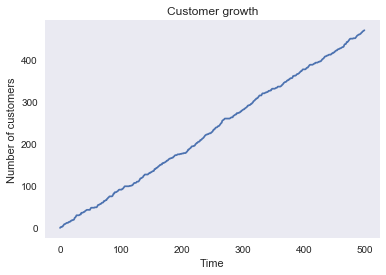

In [11]:
import matplotlib

customers = main.get_customer_growth()

# Data for plotting
x = customers

fig, ax = plt.subplots()
ax.plot(x)

ax.set(xlabel='Time', ylabel='Number of customers',
       title='Customer growth')
ax.grid()

# fig.savefig("Customer_growth.png")
plt.show()

In [12]:
print(main.get_mean_customer_growth())

0.94


In [13]:
print(main.get_mean_handler_load())

3.812


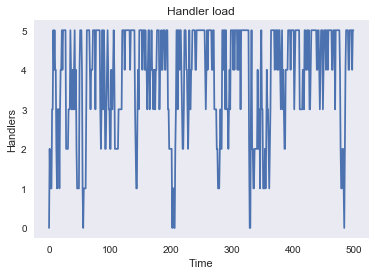

In [14]:
import matplotlib

load = main.get_handler_load()

# Data for plotting
x = load


fig, ax = plt.subplots()
ax.plot(x)

ax.set(xlabel='Time', ylabel='Handlers',
       title='Handler load')
ax.grid()

# fig.savefig("Handler_load.png")
plt.show()

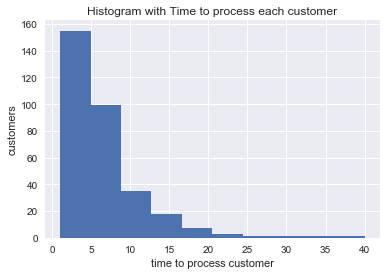

In [15]:
x =main.mean_time_spent

# the histogram of the data
n, bins, patches = plt.hist(x)


plt.xlabel('time to process customer')
plt.ylabel('customers')
plt.title('Histogram with Time to process each customer')

plt.grid(True)
plt.show()

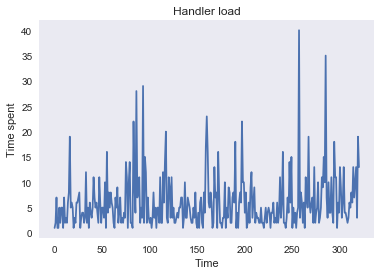

In [16]:
import matplotlib

load = main.mean_time_spent

# Data for plotting
x = load


fig, ax = plt.subplots()
ax.plot(x)

ax.set(xlabel='Time', ylabel='Time spent',
       title='Handler load')
ax.grid()

# fig.savefig("Handler_load.png")
plt.show()